<a href="https://colab.research.google.com/github/salonigupta1/TransferLearning/blob/main/ClassificationUsingTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

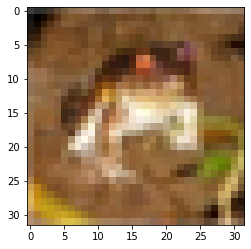

In [4]:
plt.imshow(X_train[0])

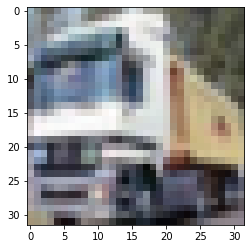

In [5]:
plt.imshow(X_train[1])

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y_train[index]])

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

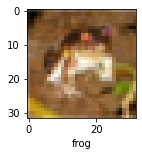

In [9]:
plot_sample(X_train, y_train, 0)

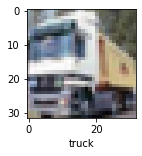

In [10]:
plot_sample(X_train, y_train, 1)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.8097 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.6217 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5414 - accuracy: 0.4581
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4838 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4331 - accuracy: 0.4968


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      1000
           1       0.56      0.69      0.62      1000
           2       0.40      0.32      0.35      1000
           3       0.34      0.29      0.31      1000
           4       0.56      0.25      0.34      1000
           5       0.40      0.40      0.40      1000
           6       0.33      0.84      0.47      1000
           7       0.65      0.45      0.53      1000
           8       0.75      0.47      0.58      1000
           9       0.60      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



In [14]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4839 - accuracy: 0.4619
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1278 - accuracy: 0.6053
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9942 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.9196 - accuracy: 0.6830
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8539 - accuracy: 0.7044
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8030 - accuracy: 0.7206
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7519 - accuracy: 0.7407
Epoch 8/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7126 - accuracy: 0.7553
Epoch 9/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6752 - accuracy: 0.7644
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [17]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9381 - accuracy: 0.6928


[0.9381111264228821, 0.692799985408783]

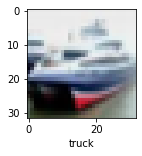

In [18]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0350205e-03, 9.9812227e-04, 1.1796277e-03, 5.2612150e-01,
        4.1965165e-04, 3.9214042e-01, 1.2288321e-02, 2.4094385e-04,
        6.0236368e-02, 5.3399811e-03],
       [1.7904644e-04, 7.6244017e-03, 1.0787304e-08, 5.9578332e-07,
        2.5311818e-08, 6.0980891e-09, 1.0244788e-07, 1.1644207e-08,
        9.9183428e-01, 3.6152583e-04],
       [6.0389705e-02, 2.1553999e-01, 1.7712513e-03, 7.1326904e-03,
        6.2678955e-03, 5.7909155e-04, 5.4669002e-04, 1.3319407e-02,
        3.3224547e-01, 3.6220780e-01],
       [8.7103391e-01, 1.9350052e-02, 1.1652860e-02, 3.6271641e-03,
        3.7304513e-04, 1.5803227e-05, 1.0320056e-02, 1.1990579e-04,
        7.9201266e-02, 4.3059308e-03],
       [1.7887091e-05, 7.8326644e-05, 5.0124037e-03, 2.4751097e-02,
        2.4155442e-01, 6.0528889e-03, 7.0751709e-01, 2.0290818e-05,
        1.4988724e-02, 6.8135496e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

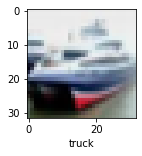

In [24]:
plot_sample(X_test, y_test, 1)

In [26]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.79      0.83      0.81      1000
           2       0.71      0.47      0.56      1000
           3       0.53      0.51      0.52      1000
           4       0.67      0.59      0.63      1000
           5       0.57      0.64      0.60      1000
           6       0.75      0.79      0.76      1000
           7       0.75      0.73      0.74      1000
           8       0.79      0.79      0.79      1000
           9       0.66      0.85      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

